In [1]:
import pandas as pd

In [4]:
file_path = '/home/b10173209/test.file/SS/all_results.xlsx' 
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [12]:
validation_results = (
    df.groupby(['C', 'kernel'])
    ['Val Macro F1']
    .mean()
    .reset_index()
    .sort_values(by='Val Macro F1', ascending=False)
)

best_params = validation_results.iloc[0]
best_params

C                    1.0
kernel            linear
Val Macro F1    0.910719
Name: 4, dtype: object

In [14]:
validation_results

,C,kernel,Val Macro F1
4,1.0,linear,0.910719
6,1.0,rbf,0.903587
8,10.0,linear,0.896894
10,10.0,rbf,0.889251
14,100.0,rbf,0.888955
5,1.0,poly,0.886209
12,100.0,linear,0.873309
7,1.0,sigmoid,0.873199
13,100.0,poly,0.871846
9,10.0,poly,0.871830


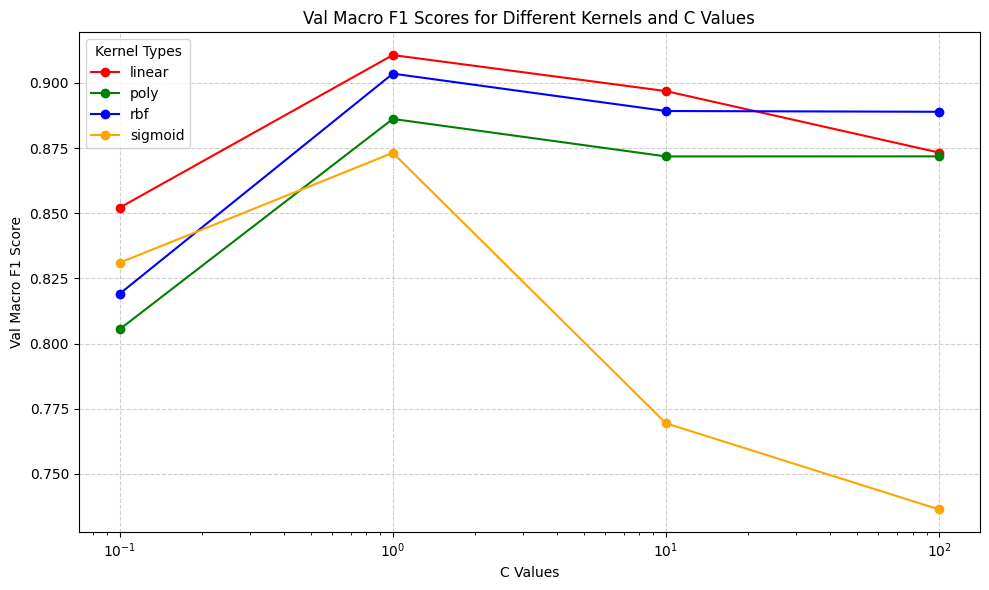

In [13]:
filtered_data = validation_results[validation_results['C'].isin([0.1, 1, 10, 100])]
pivot_data = filtered_data.pivot(index='C', columns='kernel', values='Val Macro F1')

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'orange']

for idx, kernel in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[kernel], marker='o', label=kernel, color=colors[idx])


plt.title("Val Macro F1 Scores for Different Kernels and C Values")
plt.xlabel("C Values")
plt.ylabel("Val Macro F1 Score")
plt.xscale('log')  # Log scale for C values
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Kernel Types', loc='best')
plt.tight_layout()
plt.savefig('SS.png', dpi=300, bbox_inches='tight')
plt.show()

